In [1]:
import re

In [2]:
import re

def read(file_path):
    # Regular expression patterns to match the lines of interest
    time_pattern = re.compile(r"time: ([\d\.]+)s")
    max_node_pattern = re.compile(r"MAX node: (\d+)")
    final_node_pattern = re.compile(r"final node: (\d+)")

    # Initialize lists to store the extracted information
    times = []
    max_nodes = []
    final_nodes = []

    # Read the file and extract information
    with open(file_path, 'r') as file:
        for line in file:
            # Check for time and add it to the times list
            time_match = time_pattern.search(line)
            if time_match:
                times.append(float(time_match.group(1)))
            
            # Check for MAX node and add it to the max_nodes list
            max_node_match = max_node_pattern.search(line)
            if max_node_match:
                max_nodes.append(int(max_node_match.group(1)))
            
            # Check for final node and add it to the final_nodes list
            final_node_match = final_node_pattern.search(line)
            if final_node_match:
                final_nodes.append(int(final_node_match.group(1)))
    return [times,max_nodes,final_nodes]


In [3]:
[times,maxNodes,_]=read("LimTDD_cir_2_cls.txt")

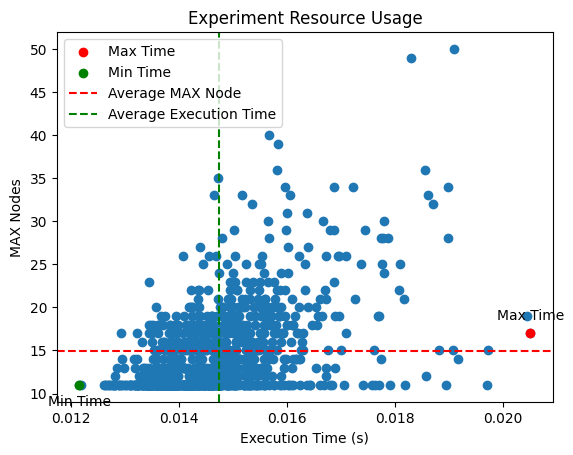

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Example data
times = np.array(times)
memory_usage = np.array(maxNodes)  

# Calculate averages
avg_time = np.mean(times)
avg_memory = np.mean(memory_usage)

# Find indices of max and min execution times
max_time_idx = np.argmax(times)
min_time_idx = np.argmin(times)

# Create scatter plot
plt.scatter(times, memory_usage)

# Highlight max and min points
plt.scatter(times[max_time_idx], memory_usage[max_time_idx], color='red', label='Max Time', zorder=5)
plt.scatter(times[min_time_idx], memory_usage[min_time_idx], color='green', label='Min Time', zorder=5)

# Add average lines
plt.axhline(y=avg_memory, color='r', linestyle='--', label='Average MAX Node')
plt.axvline(x=avg_time, color='g', linestyle='--', label='Average Execution Time')

# Add annotations for max and min points
plt.annotate('Max Time', (times[max_time_idx], memory_usage[max_time_idx]), textcoords="offset points", xytext=(0,10), ha='center')
plt.annotate('Min Time', (times[min_time_idx], memory_usage[min_time_idx]), textcoords="offset points", xytext=(0,-15), ha='center')

plt.title('Experiment Resource Usage')
plt.xlabel('Execution Time (s)')
plt.ylabel('MAX Nodes')
plt.legend()
plt.show()